### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
data = pd.read_csv('data/coupons.csv')

In [12]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
data.shape

(12684, 26)

In [14]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
#Since a significant (more than 20%) of the data in car column is Nan, I am dropping that column from the dataframe
data1 = data.drop(['car'], axis=1)
data1.shape

(12684, 25)

In [16]:
data1['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [17]:
#since Bar is a categorical variable, fill in the null values with the most frequently used value or the mode which is 'never'
data1['Bar'].fillna('never', inplace=True)
data1['Bar'].value_counts()

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [18]:
data1['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [19]:
coffeehouse_mode = data1['CoffeeHouse'].mode()[0]
data1['CoffeeHouse'].fillna(coffeehouse_mode,inplace=True)
data1['CoffeeHouse'].isnull().sum()
data1['CoffeeHouse'].value_counts()


less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [20]:
#replacing with the mode which is 1~3
CarryAway_mode = data1['CarryAway'].mode()[0]
#data1['CarryAway'].value_counts()
data1['CarryAway'].fillna(CarryAway_mode,inplace=True)
data1['CarryAway'].isnull().sum()

0

In [21]:
RestaurantLessThan20_mode = data1['RestaurantLessThan20'].mode()[0]
#data1['RestaurantLessThan20'].value_counts()
data1['RestaurantLessThan20'].fillna(RestaurantLessThan20_mode, inplace=True)
data1['RestaurantLessThan20'].isnull().sum()

0

In [22]:
Restaurant20To50_mode = data1['Restaurant20To50'].mode()[0]
data1['Restaurant20To50'].fillna(Restaurant20To50_mode, inplace=True)
data1['Restaurant20To50'].isnull().sum()
data1['Restaurant20To50'].unique()


array(['1~3', 'less1', 'never', 'gt8', '4~8'], dtype=object)

4. What proportion of the total observations chose to accept the coupon?



In [23]:
total_response = len(data1)
total_accepted = data1[data1['Y']==1].shape[0]/total_response
total_accepted

0.5684326710816777

56.84% chose to accept the cuopon

5. Use a bar plot to visualize the `coupon` column.

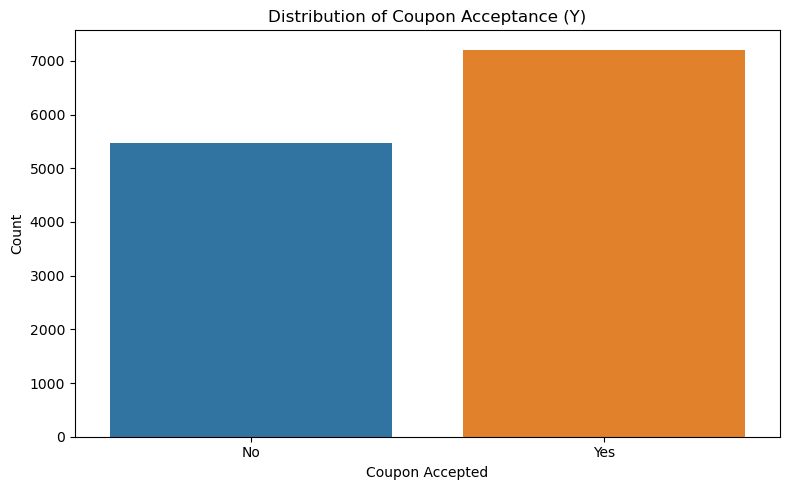

In [24]:
#sns.displot(x = 'Y', data = data1)
plt.figure(figsize=(8,5))
y_counts = data1['Y'].value_counts()
sns.barplot(x =y_counts.index, y= y_counts.values)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Coupon Accepted')
plt.ylabel('Count')
plt.title('Distribution of Coupon Acceptance (Y)')
plt.tight_layout()
plt.show()



6. Use a histogram to visualize the temperature column.

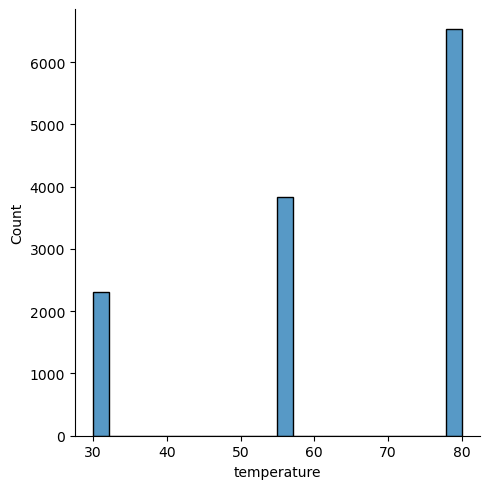

In [25]:
sns.displot(data = data1, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
data1.columns
data_bar = data1[data1['coupon'] == 'Bar']
data_bar.shape




(2017, 25)

2. What proportion of bar coupons were accepted?


In [27]:
total_bar_cuopons_offered = len(data_bar)
print(data_bar[data_bar['Y'] == 1].shape[0])
proportion_bar_coupon_accepted = data_bar[data_bar['Y'] == 1].shape[0]/total_bar_cuopons_offered

proportion_bar_coupon_accepted

827


0.41001487357461575

*41% of the bar coupons were accepted*

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
#print(data_bar['Bar'].value_counts()) #this gives the count for each value
data_bar['Bar'].unique() #['never', 'less1', '1~3', 'gt8', '4~8']
#group_1 drivers who went 3 or fewer times
group_1 = data_bar[data_bar['Bar'].isin([ 'never','less1' , '1~3'])]
#group_2 drivers who went more than 3 times
group_2 = data_bar[data_bar['Bar'].isin([ 'gt8', '4~8'])]
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()
print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")


Acceptance Rate 1: 37.07%
Acceptance Rate 2: 76.88%


*The Acceptance rate for drivers who went to bar 3 or fewer times is almost half of those who went more than 3 times.*

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
data_bar['age'].unique() #['21', '46', '26', '31', '41', '50plus', '36', 'below21']
#Clean up the strings in the age column
def is_over_25(age_str):
  if age_str == '50plus':
    return True
  elif age_str == 'below21':
    return False
  else:
    #handling age formats like 'XXplus' or 'XX'
    base_age = age_str.replace('plus','')
    return int(base_age) > 25
#Filter the data set into 2 groups

#group1 - drivers going to bar over 25 years old and goes more than once a month
group1 = data_bar[data_bar['Bar'].isin(['1~3', 'gt8', '4~8']) & data_bar['age'].apply(is_over_25)]

#group2 -  drivers who may not be over 25 years old or may not be going once or more or both
group2 = data_bar[~((data_bar['Bar'].isin(['1~3', '4~8', 'gt8']) &
                          data_bar['age'].apply(is_over_25)))]

#acceptance rate of each group
acceptance_rate_1 = group1['Y'].mean()
acceptance_rate_2 = group2['Y'].mean()

print(f"Acceptance rate for Group 1: {acceptance_rate_1:.2%}")
print(f"Acceptance rate for Group 2: {acceptance_rate_2:.2%}")
print(f"Difference in Acceptance Rate: {acceptance_rate_1 - acceptance_rate_2:.2%}")



Acceptance rate for Group 1: 69.52%
Acceptance rate for Group 2: 33.50%
Difference in Acceptance Rate: 36.02%


*The acceptance rate for drivers who go to bar more than once a month and 25 years or older is more than double that of the rest*

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
data_bar['passanger'].unique() #['Kid(s)', 'Alone', 'Friend(s)', 'Partner']
data_bar['occupation'].unique() #one of the values is 'Farming Fishing & Forestry'

#Finding drivers who go to the bar and have passengers who are not kids and occupation is not 'Farming Fishing & Forestry'
more_than_once = data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids = data_bar['passanger'] != 'Kid(s)'
occupation_not_forestry = ~data_bar['occupation'].isin(['Farming Fishing & Forestry'])

#combining all the above filters
filtered_data = data_bar[more_than_once & no_kids & occupation_not_forestry]
acceptance_rate = filtered_data['Y'].mean()

print(f"Acceptance Rate: {acceptance_rate: .2%}")




Acceptance Rate:  71.32%


*The acceptance rate for cuopon is pretty high for drivers who go to bar more than once a month, have passangers who are not kids and the occupation is not 'Farming, Fishing & Forestry'*

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
def is_under_30(age_str):
  if age_str == 'below21':
    return True
  elif age_str == '50plus':
    return False
  else:
    base_age = age_str.replace('plus','')
    return int(base_age) < 30

def income_less_than_50(income_str):
  if income_str in ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']:
    return True
  return False


#group_1 - go to bar more than once, had passengers who were not kids, and not widowed
data_bar['maritalStatus'].unique() #['Unmarried partner', 'Single', 'Married partner', 'Divorced','Widowed']
group_1 = data_bar[((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['maritalStatus'] != 'Widowed'))]

#group_2 - go to bar more than once a month and are under the age of 30
group_2 = data_bar[((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['age'].apply(is_under_30)))]

#group_3 - go to cheap restaurant more than 4 times a month and income is less than 50k
data_bar['RestaurantLessThan20'].unique() #['4~8', '1~3', 'less1', 'gt8', 'never']
data_bar['income'].unique()
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999','$75000 - $87499', '$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500']

group_3 = data_bar[(data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_bar['income'].apply(income_less_than_50))]
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()
acceptance_rate_3 = group_3['Y'].mean()

print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")
print(f"Acceptance Rate 3: {acceptance_rate_3:.2%}")



Acceptance Rate 1: 71.32%
Acceptance Rate 2: 72.17%
Acceptance Rate 3: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

*Based on the above calculations, drivers who have income less than 50K and go to the cheap restuarants tend to **not** accept the cuopon that often.
The majority who accepted the bar cuopons are the drivers who go to bar more than once a month and who do not have kid passenger and not widowed OR they are under the age of 30 and go to bar more than once a month. *


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Investigating the Coffee Coupons

In [32]:
#dataframe containing only coffee coupons
data1['coupon'].unique() #['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
data_coffee = data1[data1['coupon'] == 'Coffee House']
data_coffee.shape

(3996, 25)

**1**. **What proportion of coffee coupons were accepted?**

In [33]:
total_coffee_cuopons = len(data_coffee)
total_coffee_cuopons_accepted = data_coffee[data_coffee['Y'] == 1].shape[0]

print(f"Proportion of Coffee cuopons accepted: {total_coffee_cuopons_accepted/ total_coffee_cuopons: .2%}")


Proportion of Coffee cuopons accepted:  49.92%


*Almost 50% of the drivers who go to coffee house accepted the cuopon*

**2. Compare the acceptance rate between those who went to for coffee  3 or fewer times a month to those who went more.**


In [34]:
data_coffee['CoffeeHouse'].unique() #['never', 'less1', '4~8', '1~3', 'gt8']
#group_1 - 3 or fewer times
group_1 = data_coffee[data_coffee['CoffeeHouse'].isin(['never', 'less1','1~3'])]
#group_2 - more than 3 times
group_2 = data_coffee[data_coffee['CoffeeHouse'].isin(['4~8', 'gt8'])]
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()
print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")

Acceptance Rate 1: 44.96%
Acceptance Rate 2: 67.50%


*The acceptance rate for the coffee cuopon for people who went to coffee house more than 3 times is more than that of people who went 3 or less than 3 times.*


**3. Compare the acceptance rate by gender for the drivers who go to coffee house**

In [35]:
data_coffee['gender'].unique() #['Female', 'Male']
#group_1 - female coffee drivers
group_1 = data_coffee[data_coffee['gender'] == 'Female']
#group_2 - male coffee drivers
group_2 = data_coffee[data_coffee['gender'] == 'Male']
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()
print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")

Acceptance Rate 1: 49.24%
Acceptance Rate 2: 50.64%


*The proportion of female drivers versus male drivers who accepted coffee cuopons are pretty close*

Below is a bar chart that compares the coffee cuopon acceptance rate by gender and it does reflect the same finding as derived through calculations

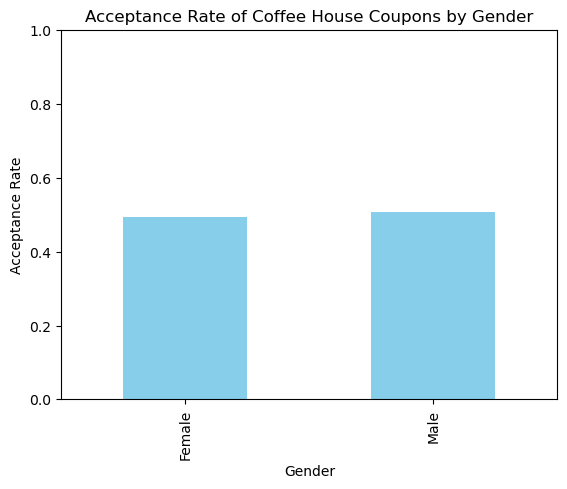

In [36]:
acceptance_rate_by_gender = data_coffee.groupby('gender')['Y'].mean()
acceptance_rate_by_gender.plot(kind='bar', color='skyblue')
plt.title('Acceptance Rate of Coffee House Coupons by Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1 for proportion display
plt.show()

**Distribution by age of drivers who go to coffee house**

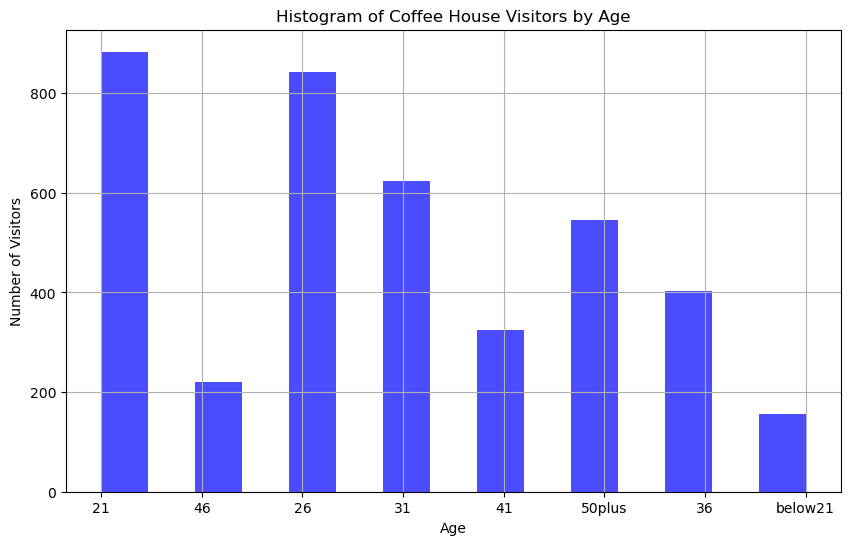

In [37]:
data_coffee['age'].unique() #['21', '46', '26', '31', '41', '50plus', '36', 'below21']
#sns.displot(x='age', data= data_coffee)

plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.hist(data_coffee['age'], bins=15, color='blue', alpha=0.7)  # Histogram plot
plt.title('Histogram of Coffee House Visitors by Age')  # Title of the histogram
plt.xlabel('Age')  # Label for the x-axis
plt.ylabel('Number of Visitors')  # Label for the y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

From the above histogram, it looks like the drivers below the age of 30 go to coffee house more than 30 plus.

**4. Comparing the acceptance rate of coffee cuopons for drivers who are 30 or older versus drivers below 30**

In [38]:
#group_1 drivers over 30years old who go to coffee house
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']

def is_under_30(age_str):
  if age_str == 'below21':
    return True
  elif age_str == '50plus':
    return False
  else:
    base_age = age_str.replace('plus','')
    return int(base_age) < 30


group_1 = data_coffee[data_coffee['age'].apply(is_under_30)]
acceptance_rate_1 = group_1['Y'].mean()
#group_2 drivers above the age of 30 who go to coffeehouse
group_2 = data_coffee[~data_coffee['age'].apply(is_under_30)]
acceptance_rate_2 = group_2['Y'].mean()
acceptance_rate_2
print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")

Acceptance Rate 1: 53.43%
Acceptance Rate 2: 46.81%


*Drivers below 30 years tend to accept coffee cuopons more than older drivers*

**Distribution of drivers who go to coffee house by occupation**

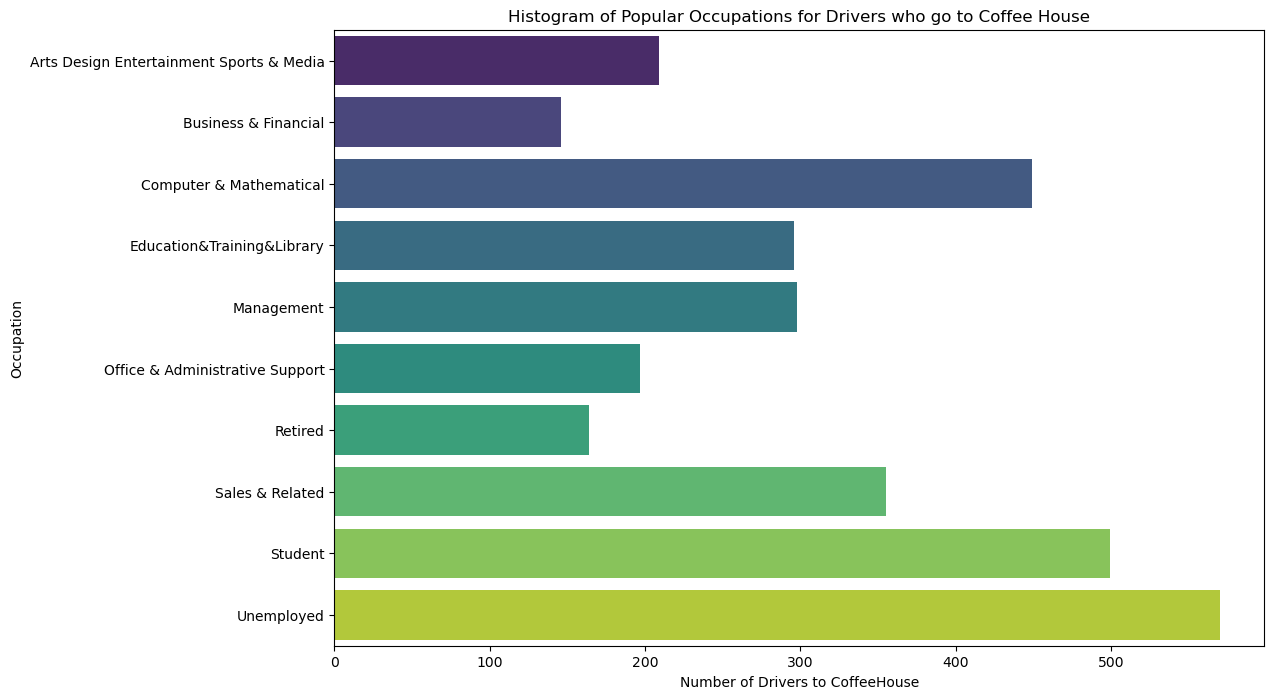

In [39]:
data_coffee['destination'].unique() #['No Urgent Place', 'Home', 'Work']
data_coffee['occupation'].unique()
data_coffee['occupation'].value_counts()
occupations_counts = data_coffee.groupby('occupation').size()

#create a dataframe from a series for easier plotting
occupations_counts_df = occupations_counts.reset_index(name = 'Count')
#Filtering out the occupations which do not have many drivers, to reduce the noise
popular_occupations = occupations_counts_df[occupations_counts_df['Count'] >= 100]

plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='Count', y='occupation', data=popular_occupations, palette='viridis')
plt.title('Histogram of Popular Occupations for Drivers who go to Coffee House')
plt.xlabel('Number of Drivers to CoffeeHouse')
plt.ylabel('Occupation')
plt.show()

*From the chart, the 3 categories with most coffee house drivers are - Unemployed, Student and Computer & Mathematical occupation*

**Comparing the acceptance rate for the above 3 categories**

In [40]:
#Comparing the acceptance rate for Unemployed, Student and Computer & Mathematical
#group_1 occupation Unemployed
group_1 = data_coffee[data_coffee['occupation'] == 'Unemployed']
acceptance_rate_1 = group_1['Y'].mean()
#group_2 occupation Student
group_2 = data_coffee[data_coffee['occupation'] == 'Student']
acceptance_rate_2 = group_2['Y'].mean()
acceptance_rate_2
#group_3 occupation = Computer & Mathematical
group_3 = data_coffee[data_coffee['occupation'] == 'Computer & Mathematical']
acceptance_rate_3 = group_3['Y'].mean()
acceptance_rate_3
print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")
print(f"Acceptance Rate 3: {acceptance_rate_3:.2%}")


Acceptance Rate 1: 54.21%
Acceptance Rate 2: 62.53%
Acceptance Rate 3: 50.33%


*From the above analysis, it seems Students accept coffee cuopons more than Unemployed who accept more than Computer & Mathematical occupation*

Below is a chart that compares the acceptance rate for drivers who go to coffee house across all the occupations. Although the highest number of drivers who go to coffee house are from occupation unemployed/ student/ Computer & Mathematical, but the acceptance rate for te cuopon is the highest for Healthcare Practioners and Technical

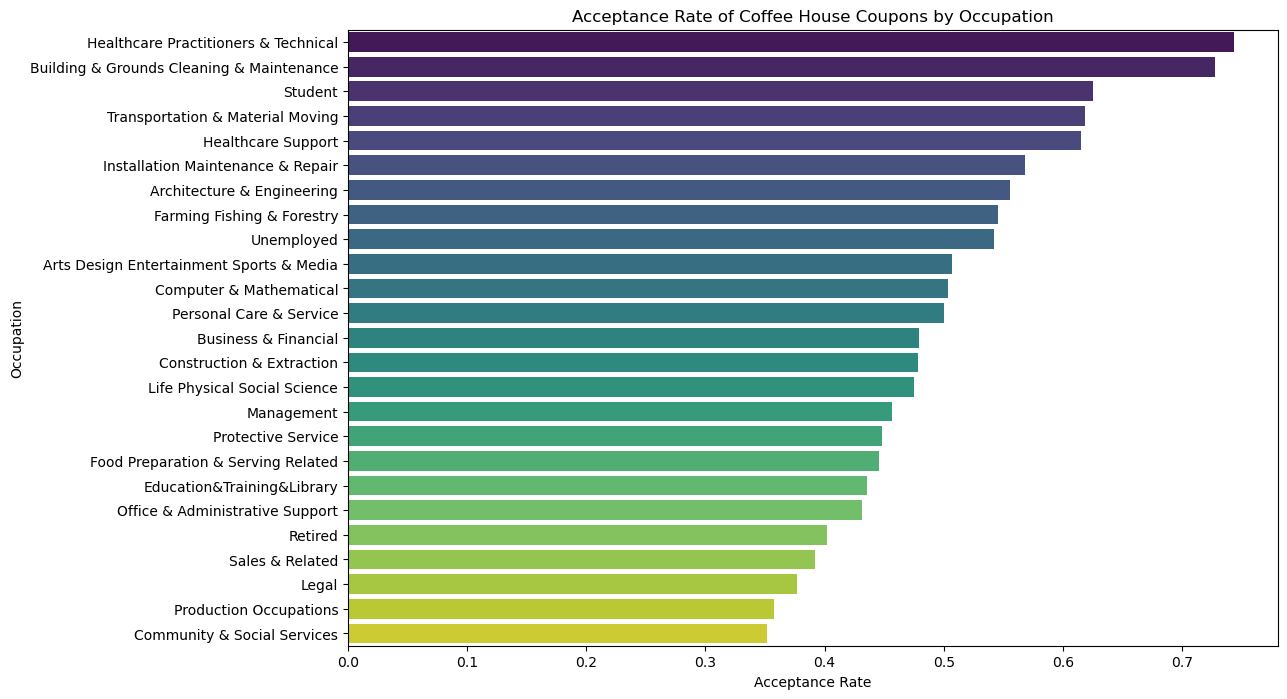

In [41]:
# Group by occupation and calculate the mean of acceptance
acceptance_rate_by_occupation = data_coffee.groupby('occupation')['Y'].mean().reset_index()

# Sorting the results for better visualization
acceptance_rate_by_occupation.sort_values(by='Y', ascending=False, inplace=True)

# Plotting with Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='Y', y='occupation', data=acceptance_rate_by_occupation, palette='viridis')
plt.title('Acceptance Rate of Coffee House Coupons by Occupation')
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.show()

 **5. Compare the acceptance rates between those drivers who:
go to coffeehouse more than once a month, had passengers that were not a kid, and were not widowed OR
go to coffeehouse more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.**

In [42]:
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
def is_under_30(age_str):
  if age_str == 'below21':
    return True
  elif age_str == '50plus':
    return False
  else:
    base_age = age_str.replace('plus','')
    return int(base_age) < 30

#condition_1 - go to coffeehouse more than once a month, had passengers that were not a kid, and were not widowed
data_coffee['passanger'].unique() #['Friend(s)', 'Kid(s)', 'Alone', 'Partner']
data_coffee['maritalStatus'].unique() #['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed']

condition_1 = (data_coffee['CoffeeHouse'].isin(['4~8', '1~3', 'gt8'])) & (data_coffee['passanger'] !=  'Kid(s)') & (data_coffee['maritalStatus'] != 'Widowed')
group_1 = data_coffee[condition_1]
acceptance_rate_1 = group_1['Y'].mean()

print(f"Acceptance Rate 1: {acceptance_rate_1:.2%}")

#condition_2 - go to coffeehouse more than once a month and are under the age of 30
condition_2 = data_coffee['CoffeeHouse'].isin(['4~8', '1~3', 'gt8']) & data_coffee['age'].apply(is_under_30)
group_2 = data_coffee[condition_2]
acceptance_rate_2 = group_2['Y'].mean()
print(f"Acceptance Rate 2: {acceptance_rate_2:.2%}")

#condition_3 - go to cheap restaurants more than 4 times a month and income is less than 50K
data_coffee['RestaurantLessThan20'].unique() #['4~8', '1~3', 'less1', 'gt8', 'never']
data_coffee['income'].unique()
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999','$75000 - $87499', '$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500']

def income_less_than_50(income_str):
  if income_str in ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']:
    return True
  return False

#condition_3 = data_coffee['Restaurant20To50']
data_coffee['Restaurant20To50'].unique()  #['1~3', 'less1', 'never', 'gt8', '4~8']
condition_3 = data_coffee['Restaurant20To50'].isin(['gt8', '4~8']) & data_coffee['income'].apply(income_less_than_50)
group_3 = data_coffee[condition_3]
acceptance_rate_3 = group_3['Y'].mean()
print(f"Acceptance Rate 3: {acceptance_rate_3:.2%}")


Acceptance Rate 1: 66.08%
Acceptance Rate 2: 68.93%
Acceptance Rate 3: 68.70%


*Looks like the acceptance rate for drivers who go to coffee house is pretty constance across various conditions listed above*